# Data Cleaning

In [18]:
import pandas as pd
import numpy as np
data = pd.read_excel('layoffs 2022.xlsx') # Importing Raw uncleaned dataset
data = data.dropna(how= 'all', axis = 0 ) # Deleting totally blank rows
data = data.dropna(how= 'all', axis = 1 ) # Deleting totally blank columns
data.columns 
df = pd.DataFrame(data)
df["total_laid_off"] = df["total_laid_off"].replace(np.nan, 0) # Replacing NaN values to 0 in total-laid-off column
df = pd.DataFrame(data)
df["percentage_laid_off"] = df["percentage_laid_off"].replace(np.nan, 0)# Replacing NaN values to 0 in percentage_laid_off column
df = pd.DataFrame(data)
df = pd.DataFrame(data)
df["funds_raised"] = df["funds_raised"].replace(np.nan, 0) # Replacing NaN values to 0 in funds_raised column
df = pd.DataFrame(data)
df["stage"] = df["stage"].replace(np.nan, 'Unknown') # Replacing NaN values to Unknown in stage column
df.to_excel('FinalProject_cleaneddata.xlsx') # Exporting and saving cleaned dataset
df.head(50)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lyst,London,Retail,50.0,0.25,2022-11-29,Unknown,United Kingdom,144.0
1,Bitfront,SF Bay Area,Crypto,0.0,1.00,2022-11-29,Unknown,United States,0.0
2,Lazerpay,Lagos,Crypto,0.0,0.00,2022-11-29,Unknown,Nigeria,0.0
3,MessageBird,Amsterdam,Other,0.0,0.31,2022-11-29,Series C,Netherlands,1100.0
4,Plerk,Guadalajara,Finance,0.0,0.40,2022-11-29,Unknown,Mexico,0.0
5,Infarm,Berlin,Other,500.0,0.50,2022-11-28,Series D,Germany,604.0
6,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,2022-11-28,Unknown,Brazil,260.0
7,Hirect,Bengaluru,Recruiting,200.0,0.40,2022-11-28,Series A,India,0.0
8,ApplyBoard,Waterloo,Education,90.0,0.06,2022-11-28,Series D,Canada,483.0
9,Ajaib,Jakarta,Finance,67.0,0.08,2022-11-28,Unknown,Indonesia,245.0


## Data Manipulation

### Categorising employees Laid off in each country

In [19]:
LaidoffByCountry= df.groupby(['country'])['total_laid_off'].sum()
print(LaidoffByCountry)

country
Argentina                  230.0
Australia                 1115.0
Austria                    470.0
Bahrain                      0.0
Belgium                      0.0
Brazil                    7525.0
Bulgaria                   120.0
Canada                    5199.0
Chile                       30.0
China                     4430.0
Colombia                    30.0
Czech Republic               0.0
Denmark                    240.0
Egypt                        0.0
Estonia                    267.0
Finland                    250.0
France                       0.0
Germany                   4113.0
Greece                       0.0
Hong Kong                  730.0
Hungary                      0.0
India                    29681.0
Indonesia                 2827.0
Ireland                    221.0
Israel                    2108.0
Kenya                      349.0
Lithuania                   60.0
Luxembourg                  45.0
Malaysia                   100.0
Mexico                     170.0
My

### Grouping total laid off during each year 

In [20]:
GroupByYear= df.groupby(df['date'].dt.year)['total_laid_off'].agg(['sum'])
print(GroupByYear)

           sum
date          
2020   80968.0
2021   15023.0
2022  140080.0


### Categorising specific country and industry based on specific funding stage

In [21]:
FundingStages=df.loc[df['stage'] == 'Acquired']
result = FundingStages.loc[(FundingStages['country']=='United States') & (FundingStages['industry']=='Media')]
result.head(50)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
40,StoryBlocks,Washington D.C.,Media,0.0,0.25,2022-11-18,Acquired,United States,18.0
50,Morning Brew,New York City,Media,0.0,0.14,2022-11-17,Acquired,United States,0.0
71,Protocol,SF Bay Area,Media,60.0,1.00,2022-11-15,Acquired,United States,0.0
552,Tapas Media,SF Bay Area,Media,0.0,0.00,2022-07-28,Acquired,United States,17.0
974,Humble,SF Bay Area,Media,10.0,0.00,2022-04-15,Acquired,United States,4.0
1042,HuffPo,New York City,Media,47.0,0.00,2021-03-09,Acquired,United States,37.0
1098,Big Fish Games,Seattle,Media,250.0,0.00,2020-09-01,Acquired,United States,95.2
1104,Spaces,Los Angeles,Media,0.0,0.00,2020-08-24,Acquired,United States,9.5
1237,Quartz,New York City,Media,80.0,0.40,2020-05-14,Acquired,United States,0.0
1340,Cheddar,New York City,Media,0.0,0.00,2020-04-24,Acquired,United States,54.0


### Top 5 Countries where layoff has occurred

<AxesSubplot:>

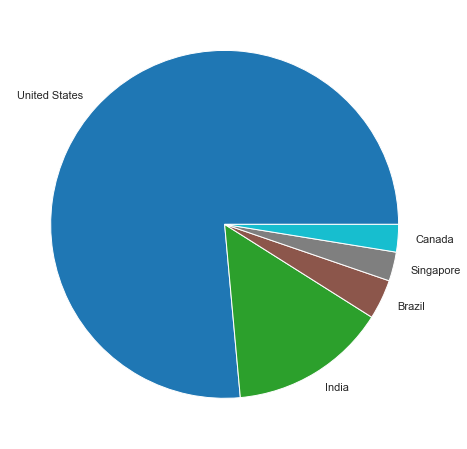

In [22]:
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8),kind='pie', stacked=True, colormap='tab10')

### Total layoffs worldwide since 2020 in various industries

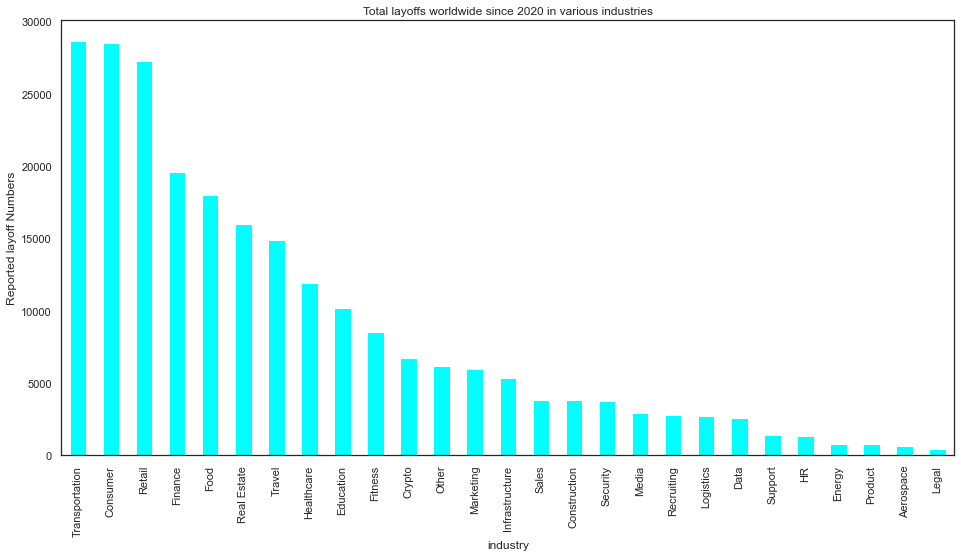

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Total layoffs worldwide since 2020 in various industries")
plt.ylabel("Reported layoff Numbers")
dfIndustries2020 = df.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='cool')

### Annual layoffs across industries in every country 

<AxesSubplot:title={'center':'Annual layoffs across industries in every country'}, xlabel='industry', ylabel='total_laid_off'>

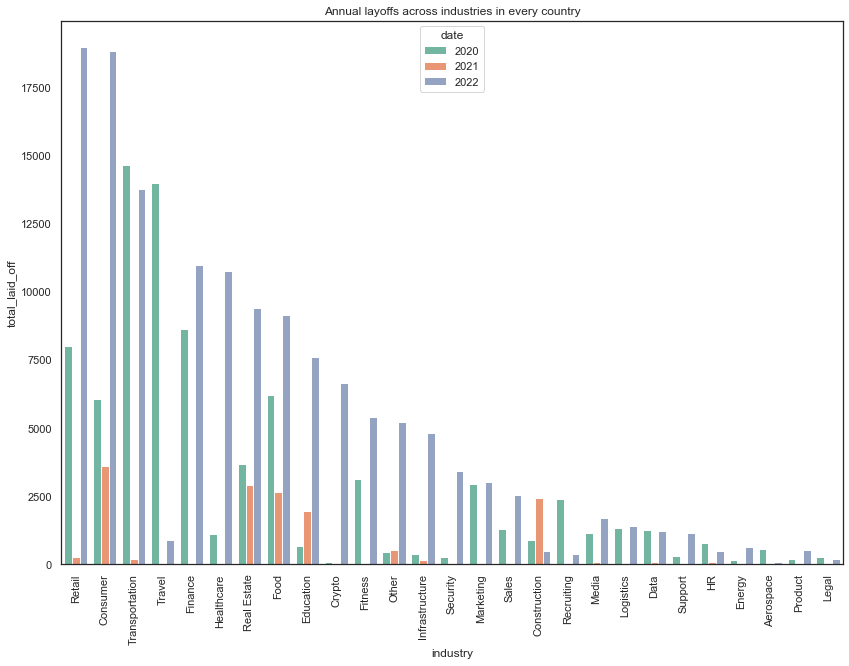

In [24]:
import seaborn as sns
df['date'] = pd.to_datetime(df['date'])
dfIndustryAnnual = df.groupby([ df.industry, df.date.dt.year]).sum()
dfIndustryAnnual = dfIndustryAnnual.reset_index()
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title("Annual layoffs across industries in every country")
sns.set(style="white", palette="Set2", color_codes=True)
sns.barplot(data=dfIndustryAnnual.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

### Top 5 Companies that laid off Staff's in 2022

In [25]:
df = df.set_index('date')
df2022Companies = df.loc[:'2022']
df2021Companies = df.loc[(df.index > '2021-01-01')&(df.index < '2022-01-01')]
df2020Companies = df.loc[(df.index > '2020-01-01')&(df.index < '2021-01-01')]
df2022CompaniesLayoffCount = df2022Companies.sort_values(by='total_laid_off', ascending=False)
df2022CompaniesLayoffCount.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised
date,,,,,,,,
2022-11-09,Meta,SF Bay Area,Consumer,11000.0,0.13,IPO,United States,26000.0
2022-11-16,Amazon,Seattle,Retail,10000.0,0.03,IPO,United States,108.0
2020-07-30,Booking.com,Amsterdam,Travel,4375.0,0.25,Acquired,Netherlands,0.0
2022-11-16,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,IPO,United States,2.0
2022-11-04,Twitter,SF Bay Area,Consumer,3700.0,0.50,IPO,United States,12900.0
